2.
Total number of histograms: 688

Number of histograms per breed:
n02093991-Irish_terrier: 184
n02098413-Lhasa: 191
n02102480-Sussex_spaniel: 153
n02105412-kelpie: 160

Total number of breeds: 4
Total number of samples: 688
Number of training samples: 549
Number of test samples: 139
Number of breeds: 4

3.
Breed-wise split:
n02093991-Irish_terrier: Total=184, Train=147, Test=37, Train Ratio=0.80
n02098413-Lhasa: Total=191, Train=152, Test=39, Train Ratio=0.80
n02102480-Sussex_spaniel: Total=153, Train=122, Test=31, Train Ratio=0.80
n02105412-kelpie: Total=160, Train=128, Test=32, Train Ratio=0.80

4.
Shape of X_train_scaled: (549, 108)

Mean of scaled features:
[-7.69471513e-17 -3.96363776e-17 -1.28717114e-16 -2.42671699e-17
  1.04753284e-16  1.24975925e-16  5.98590192e-17  3.47829436e-17
  3.43784907e-17  2.83116983e-18 -3.61985285e-17 -9.10018873e-19
  5.29833210e-17 -4.24928257e-17 -1.61180773e-17  4.90019885e-17
 -7.24855310e-18  2.68455567e-17  3.18506605e-18 -2.32560379e-18
 -8

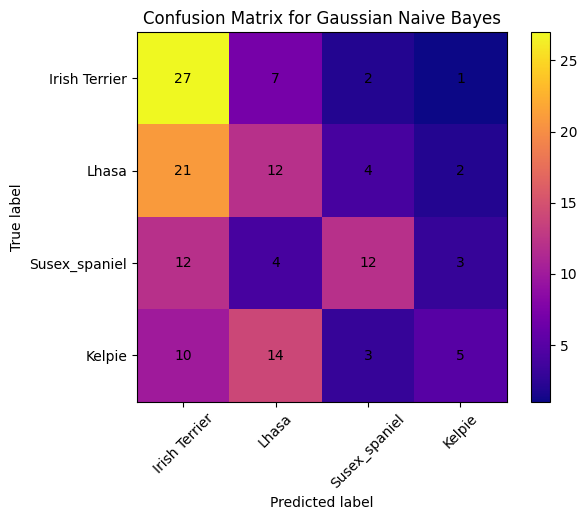


Mean Validation accuracies for Gaussian method:  0.37329441201000835
Test accuracy for Gaussian method:  0.4028776978417266
F-measure for Gaussian method:  0.3794117945521905 



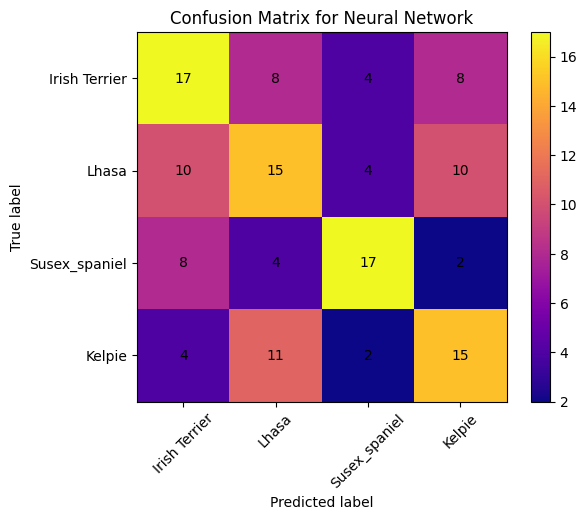


Mean Validation accuracies for Neural Network/MLP method:  0.46081734778982486
Test accuracy for Neural Network/MLP method:  0.460431654676259
F-measure for Neural Network/MLP method:  0.46221732932238296 



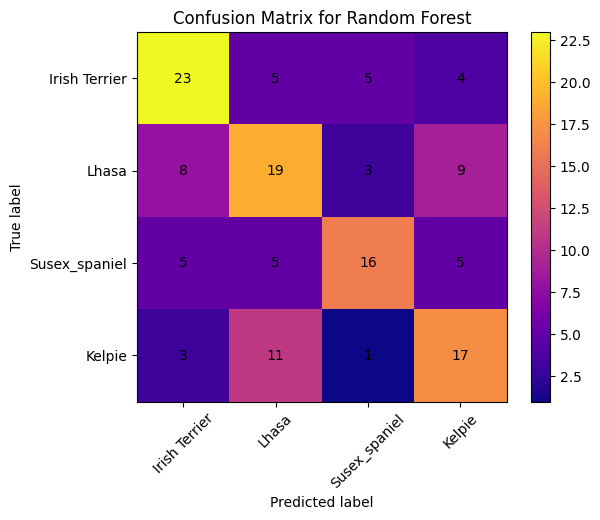


Mean Validation accuracies for Random Forest method:  0.5154462051709758
Test accuracy for Random Forest method:  0.539568345323741
F-measure for Random Forest method:  0.5403404474634986 



In [15]:
import numpy as np
import skimage as ski
import glob
from skimage import io
import os
import math
import random
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# for #6.:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
# for #7.:
from sklearn.svm import LinearSVC

#SCOTT KALAFUT, NOVEMBER 1 2024, DATA MINING I
if __name__ == '__main__':
    #2.:
    image_paths = glob.glob('./stanford-dogs-dataset/images/Images/*/*')
    histograms = []
    breed_labels = []
    histograms_by_breed = {}
   
    for image_path in image_paths:
        if image_path.endswith(".jpg") and not image_path.endswith("-0.jpg"):
            pcaimage_path = io.imread(image_path)
            breed = os.path.basename(os.path.dirname(image_path))
            breed_labels.append(breed)

            hist_r, _ = np.histogram(pcaimage_path[:, :, 0], bins=36, range=(0, 256))
            hist_g, _ = np.histogram(pcaimage_path[:, :, 1], bins=36, range=(0, 256))
            hist_b, _ = np.histogram(pcaimage_path[:, :, 2], bins=36, range=(0, 256))
            
            hist_combined = np.concatenate([hist_r, hist_g, hist_b])
            histograms.append(hist_combined)

            if breed not in histograms_by_breed:
                histograms_by_breed[breed] = []
                
            histograms_by_breed[breed].append(hist_combined)

    print(f"2.\nTotal number of histograms: {len(histograms)}")

    print("\nNumber of histograms per breed:")
    for breed, breed_histograms in histograms_by_breed.items():
        print(f"{breed}: {len(breed_histograms)}")

    print(f"\nTotal number of breeds: {len(histograms_by_breed)}")
    
    #3.:
    testSplit = 0.2
    X_train = []
    X_test = []
    y_train = []
    y_test = []

    for breed, breed_histograms in histograms_by_breed.items():
        # Shuffle the histograms to ensure randomness
        random.shuffle(breed_histograms)
    
        # Calculate the split point
        split_point = math.floor(len(breed_histograms) * (1 - testSplit))
    
        # Split the data
        breedTrain = breed_histograms[:split_point]
        breedTest = breed_histograms[split_point:]
        
        # Add to overall train and test sets
        X_train.extend(breedTrain)
        X_test.extend(breedTest)
        y_train.extend([breed] * len(breedTrain))
        y_test.extend([breed] * len(breedTest))

    # Print some statistics
    print(f"Total number of samples: {len(X_train) + len(X_test)}")
    print(f"Number of training samples: {len(X_train)}")
    print(f"Number of test samples: {len(X_test)}")
    print(f"Number of breeds: {len(histograms_by_breed)}")

    # If you want to verify the split for each breed
    breed_counts = {}
    for breed in histograms_by_breed.keys():
        train_count = y_train.count(breed)
        test_count = y_test.count(breed)
        total_count = train_count + test_count
        breed_counts[breed] = {
            'total': total_count,
            'train': train_count,
            'test': test_count,
            'train_ratio': train_count / total_count if total_count > 0 else 0
        }

    print("\n3.\nBreed-wise split:")
    for breed, counts in breed_counts.items():
        print(f"{breed}: Total={counts['total']}, Train={counts['train']}, Test={counts['test']}, Train Ratio={counts['train_ratio']:.2f}")

    #4.:
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    print(f"\n4.\nShape of X_train_scaled: {X_train_scaled.shape}")    

    #5.:
    means = scaler.mean_
    variances = scaler.scale_

    print("\nMean of scaled features:")
    print(np.mean(X_train_scaled, axis=0))

    print("\nStandard deviation of scaled features:")
    print(np.std(X_train_scaled, axis=0))
    X_test = np.array(X_test)
    X_test_scaled = scaler.transform(X_test)
    print("\n5.\nShape of original X_test:", X_test.shape)
    print("Shape of X_test_scaled:", X_test_scaled.shape)

    #6.: #9429: (1) Naive Bayes, (2) Neural Network, (3) Random Forest Classifier
    # References:
    # https://www.w3schools.com/python/python_ml_cross_validation.asp (for the cross validation prediction method)    
    # https://www.geeksforgeeks.org/how-to-draw-2d-heatmap-using-matplotlib-in-python/# (for plotting the heat map)
    def getValidation(model, X_train, y_train, X_test, y_test):

        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        mean_cv_accuracy = np.mean(cv_scores)
        
        kfold = StratifiedKFold(n_splits=5)
        validation_scores = []
        y_train = np.array(y_train)

        for fold, (train_index, val_index) in enumerate(kfold.split(X_train_scaled, y_train), 1):
            X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
            model.fit(X_train_fold, y_train_fold)
            score = model.score(X_val_fold, y_val_fold)
            validation_scores.append(score)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        test_accuracy = model.score(X_test, y_test)
        f_measure = f1_score(y_test, y_pred, average='weighted')
        return y_pred, mean_cv_accuracy, test_accuracy, f_measure

    
    class_names = ['Irish Terrier', 'Lhasa', 'Susex_spaniel', 'Kelpie']
    # (1):
    gnb = GaussianNB()
    y_pred_gnb, mean_cv_accuracy, test_accuracy, f_measure = getValidation(gnb, X_train_scaled, y_train, X_test_scaled, y_test)
    cm_gnb = confusion_matrix(y_test, y_pred_gnb)

    colors_list = ['#0099ff', '#33cc33'] 
    cmap = colors.ListedColormap(colors_list) 
    plt.imshow(cm_gnb, interpolation='nearest', cmap=plt.cm.plasma)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    for i, j in np.ndindex(cm_gnb.shape):
        plt.text(j, i, cm_gnb[i, j], ha="center", va="center",color="black")
    plt.colorbar()
    plt.title('Confusion Matrix for Gaussian Naive Bayes')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print("\nMean Validation accuracies for Gaussian method: ", mean_cv_accuracy)
    print("Test accuracy for Gaussian method: ", test_accuracy)
    print("F-measure for Gaussian method: ", f_measure, "\n")
    
    # (2):
    mlp = MLPClassifier(max_iter=700)
    y_pred_mlp, mean_cv_accuracy, test_accuracy, f_measure = getValidation(mlp, X_train_scaled, y_train, X_test_scaled, y_test)
    cm_mlp = confusion_matrix(y_test, y_pred_mlp)

    colors_list = ['#0099ff', '#33cc33'] 
    cmap = colors.ListedColormap(colors_list) 
    plt.imshow(cm_mlp, interpolation='nearest', cmap=plt.cm.plasma)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    for i, j in np.ndindex(cm_mlp.shape):
        plt.text(j, i, cm_mlp[i, j], ha="center", va="center",color="black")
    plt.colorbar()
    plt.title('Confusion Matrix for Neural Network')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print("\nMean Validation accuracies for Neural Network/MLP method: ", mean_cv_accuracy)
    print("Test accuracy for Neural Network/MLP method: ", test_accuracy)
    print("F-measure for Neural Network/MLP method: ", f_measure, "\n")
    
    # (3):
    rf = RandomForestClassifier()
    y_pred_rf, mean_cv_accuracy, test_accuracy, f_measure = getValidation(rf, X_train_scaled, y_train, X_test_scaled, y_test)
    cm_rf = confusion_matrix(y_test, y_pred_rf)

    colors_list = ['#0099ff', '#33cc33'] 
    cmap = colors.ListedColormap(colors_list) 
    plt.imshow(cm_rf, interpolation='nearest', cmap=plt.cm.plasma)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    for i, j in np.ndindex(cm_rf.shape):
        plt.text(j, i, cm_rf[i, j], ha="center", va="center",color="black")
    plt.colorbar()
    plt.title('Confusion Matrix for Random Forest')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print("\nMean Validation accuracies for Random Forest method: ", mean_cv_accuracy)
    print("Test accuracy for Random Forest method: ", test_accuracy)
    print("F-measure for Random Forest method: ", f_measure, "\n")
    

In [3]:
    #6. (cont'd)
    print("\n6.\nVisually, the Random Forest provides the most information based on colors.")
    print("It shows higher instances of correctly labeled predictions for each class.")
    print("The highest mean cross validation accuracy is Random Forest at ", mean_cv_accuracy)
    print("The highest test accuracy is Random Forest or at ", test_accuracy)
    print("The highest f-measure score is also Random Forest at ", f_measure)
    print("Becuase of randomness, the best approach is always between Random Forest or Neural Network.")


6.
Visually, the Neural Network provides the most information based on colors.
It shows higher instances of correctly labeled predictions for each class.
The highest mean cross validation accuracy is Neural Network at  0.4917764804003336
The highest test accuracy is Neural Network or at  0.4460431654676259
The highest f-measure score is also Neural Network at  0.44574204232639


C:\Users\Scott\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


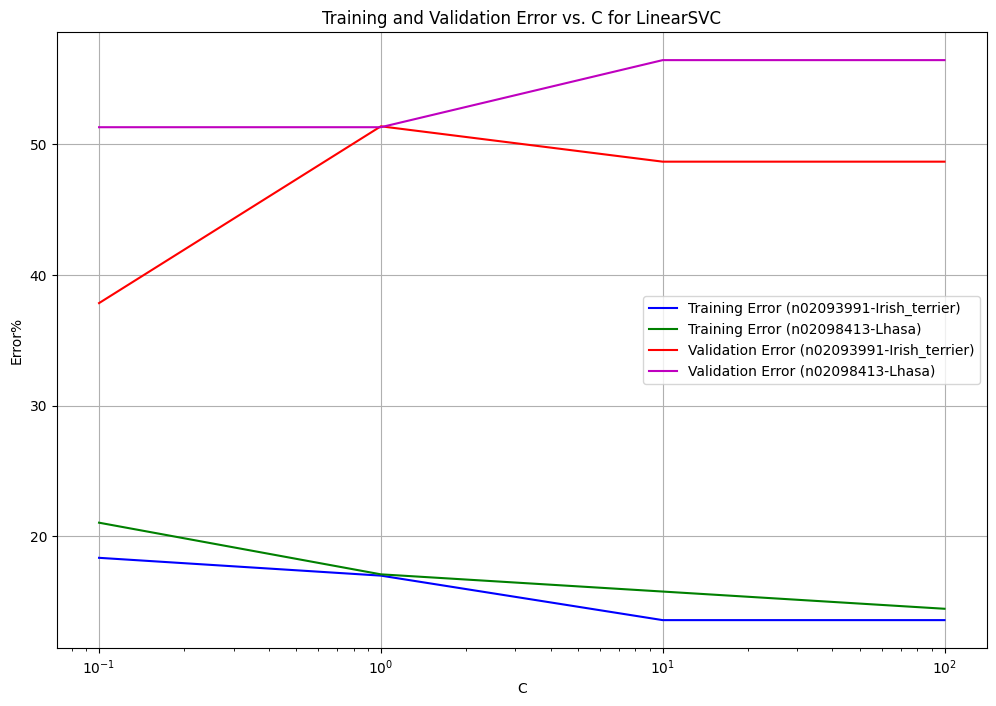

In [23]:
    #7.:
    breeds_to_use = list(histograms_by_breed.keys())[:2]

    X_train = []
    X_test = []
    y_train = []
    y_test = []

    for breed in breeds_to_use:
        breed_histograms = histograms_by_breed[breed]
        split_point = math.floor(len(breed_histograms) * (1 - testSplit))

        breedTrain = breed_histograms[:split_point]
        breedTest = breed_histograms[split_point:]
    
        X_train.extend(breedTrain)
        X_test.extend(breedTest)
        y_train.extend([breed] * len(breedTrain))
        y_test.extend([breed] * len(breedTest))

    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    def getValidation(X_train, y_train, X_test, y_test, C_values):
        results = []
        breeds = np.unique(y_train)
        for C in C_values:
            model = LinearSVC(C=C)
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
            mean_cv_accuracy = np.mean(cv_scores)
            model.fit(X_train, y_train)
        
            train_errors = {}
            val_errors = {}
            
            for breed in breeds:
                train_mask = y_train == breed
                test_mask = y_test == breed
            
                train_accuracy = model.score(X_train[train_mask], y_train[train_mask])
                train_errors[breed] = 1 - train_accuracy
            
                val_accuracy = model.score(X_test[test_mask], y_test[test_mask])
                val_errors[breed] = 1 - val_accuracy
        
            results.append({'C': C, 'train_errors': train_errors,'val_errors': val_errors})
            
        return results

    C_values = [0.1, 1, 10, 100]
    results = getValidation(X_train_scaled, y_train, X_test_scaled, y_test, C_values)

    breeds = list(results[0]['train_errors'].keys())

    C_values = [result['C'] for result in results]
    train_errors_breed1 = [result['train_errors'][breeds[0]] * 100 for result in results]
    train_errors_breed2 = [result['train_errors'][breeds[1]] * 100 for result in results]
    val_errors_breed1 = [result['val_errors'][breeds[0]] * 100 for result in results]
    val_errors_breed2 = [result['val_errors'][breeds[1]] * 100 for result in results]

    plt.figure(figsize=(12, 8))
    plt.semilogx(C_values, train_errors_breed1, 'b-', label=f'Training Error ({breeds[0]})')
    plt.semilogx(C_values, train_errors_breed2, 'g-', label=f'Training Error ({breeds[1]})')
    plt.semilogx(C_values, val_errors_breed1, 'r-', label=f'Validation Error ({breeds[0]})')
    plt.semilogx(C_values, val_errors_breed2, 'm-', label=f'Validation Error ({breeds[1]})')
    plt.xlabel('C')
    plt.ylabel('Error%')
    plt.title('Training and Validation Error vs. C for LinearSVC')
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
    #7.:
    print("C-value of 100 typically yields the lowest mean error rates on teh training data, but not for validation.")
    print("The model appears to show overfitting, since the training error is low, while the validation\nerror is high, particularly as C-value increases.")
    C100 = next(result for result in results if result['C'] == 100)
    test_error_breed1 = C100['val_errors'][breeds[0]] * 100
    test_error_breed2 = C100['val_errors'][breeds[1]] * 100
    print("Test error for {breeds[0]} when C = 100: ", test_error_breed1)
    print("Test error for {breeds[1]} when C = 100: ", test_error_breed2)
    breed1_test_samples = sum(y_test == breeds[0])
    breed2_test_samples = sum(y_test == breeds[1])
    total_test_samples = len(y_test)
    overall_test_error = (
        (test_error_breed1 * breed1_test_samples + test_error_breed2 * breed2_test_samples) 
        / total_test_samples
    )
    print("Overall test error when C = 100: ", overall_test_error)

C-value of 100 typically yields the lowest mean error rates on teh training data, but not for validation.
The model appears to show overfitting, since the training error is low, while the validation
error is high, particularly as C-value increases.
Test error for {breeds[0]} when C = 100:  48.64864864864865
Test error for {breeds[1]} when C = 100:  56.41025641025641
Overall test error when C = 100:  52.63157894736842
